In [1]:
import numpy as np
import pygimli as pg
from pygimli.frameworks.lsqrinversion import LSQRInversion
from pygimli.physics.ert import VESModelling

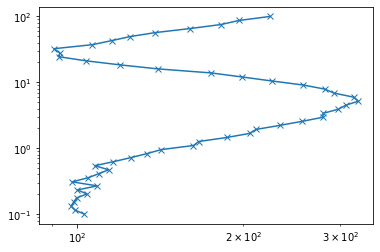

In [2]:
nlay = 4  # number of layers
lam = 200.  # (initial) regularization parameter
errPerc = 3.  # relative error of 3 percent
ab2 = np.logspace(-1, 2, 50)  # AB/2 distance (current electrodes)
mn2 = ab2 / 3.  # MN/2 distance (potential electrodes)
f = VESModelling(ab2=ab2, mn2=mn2, nLayers=nlay)
synres = [100., 500., 20., 800.]  # synthetic resistivity
synthk = [0.5, 3.5, 6.]  # synthetic thickness (nlay-th layer is infinite)
rhoa = f(synthk+synres)
rhoa = rhoa * (pg.randn(len(rhoa)) * errPerc / 100. + 1.)
pg.plt.loglog(rhoa, ab2, "x-")

In [3]:
tLog = pg.trans.TransLog()
inv = LSQRInversion(fop=f, verbose=True)
inv.LSQRiter = 20
# inv = pg.Inversion(fop=f)
inv.dataTrans = tLog
inv.modelTrans = tLog
startModel = pg.cat(pg.Vector(nlay-1, 8), pg.Vector(nlay, pg.median(rhoa)))
inv.inv.setMarquardtScheme()
model1 = inv.run(rhoa, pg.Vector(len(rhoa), errPerc/100), lam=1000, startModel=startModel)
print(model1)
print(inv.chi2(), inv.relrms(), pg.sum(inv.model[:nlay-1]))
G = pg.Matrix(rows=1, cols=len(startModel))
for i in range(3):
    G.setVal(0, i, 1)

c = pg.Vector(1, pg.sum(synthk))
inv.setParameterConstraints(G, c, 100)
model2 = inv.run(rhoa, pg.Vector(len(rhoa), errPerc/100), lam=1000, startModel=startModel)
print(model2)
print(inv.chi2(), inv.relrms(), pg.sum(inv.model[:nlay-1]))

13/12/22 - 22:18:59 - pyGIMLi - INFO - Starting inversion.
13/12/22 - 22:18:59 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:18:59 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


fop: <pygimli.physics.ert.ves.VESModelling object at 0x000001DFCBF179F0>
Data transformation: <pygimli.core._pygimli_.RTransLog object at 0x000001DFCCC8A360>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x000001DFBB795CA0>
	 1 <pygimli.core._pygimli_.RTransLogLU object at 0x000001DFCBF0A7C0>
min/max (data): 90.78/323
min/max (error): 3%/3%
min/max (start model): 8/139
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... Running one inversion step!


13/12/22 - 22:18:59 - pyGIMLi - INFO - 0 55.232245913443876 1.0
13/12/22 - 22:18:59 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:18:59 - pyGIMLi - INFO - 4 5.313784150373969e-13 9.620800426441758e-15
13/12/22 - 22:18:59 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:18:59 - pyGIMLi - INFO - 4 5.313784150373969e-13 9.620800426441758e-15
13/12/22 - 22:18:59 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:18:59 - pyGIMLi - INFO - 0 42.557450451842726 1.0
13/12/22 - 22:18:59 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:18:59 - pyGIMLi - INFO - 7 2.5089633036547257e-07 5.895473711456999e-09
13/12/22 - 22:18:59 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:18:59 - pyGIMLi - INFO - 7 2.5089633036547257e-07 5.895473711456999e-09
13/12/22 - 22:19:00 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 181.28 (dPhi = 8.24%) lam: 1000
--------------------------------------------------------------------------------
inv.iter 2 ... Running one inversion step!
chi² = 177.39 (dPhi = 2.14%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... Running one inversion step!


13/12/22 - 22:19:00 - pyGIMLi - INFO - 0 39.25273590213474 1.0
13/12/22 - 22:19:00 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 7 2.7307115728351314e-08 6.956742020845031e-10
13/12/22 - 22:19:00 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 7 2.7307115728351314e-08 6.956742020845031e-10
13/12/22 - 22:19:00 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:00 - pyGIMLi - INFO - 0 36.09278406023396 1.0
13/12/22 - 22:19:00 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 8 2.5267620764758427e-08 7.000740292738348e-10
13/12/22 - 22:19:00 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 8 2.5267620764758427e-08 7.000740292738348e-10
13/12/22 - 22:19:00 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 173.85 (dPhi = 2.0%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... Running one inversion step!
chi² = 154.61 (dPhi = 11.07%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 5 ... Running one inversion step!


13/12/22 - 22:19:00 - pyGIMLi - INFO - 0 24.834596893606932 1.0
13/12/22 - 22:19:00 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 8 2.953763961240445e-09 1.1893746348670632e-10
13/12/22 - 22:19:00 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 8 2.953763961240445e-09 1.1893746348670632e-10
13/12/22 - 22:19:00 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:00 - pyGIMLi - INFO - 0 34.33072802673129 1.0
13/12/22 - 22:19:00 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 8 1.687127245748958e-07 4.9143357648439394e-09
13/12/22 - 22:19:00 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:00 - pyGIMLi - INFO - 8 1.687127245748958e-07 4.9143357648439394e-09


chi² = 114.03 (dPhi = 26.25%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 6 ... Running one inversion step!


13/12/22 - 22:19:00 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:01 - pyGIMLi - INFO - 0 85.59033506631235 1.0
13/12/22 - 22:19:01 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 8 1.4208364672584529e-08 1.660043118370362e-10
13/12/22 - 22:19:01 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 8 1.4208364672584529e-08 1.660043118370362e-10


chi² = 54.74 (dPhi = 51.99%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 7 ... Running one inversion step!


13/12/22 - 22:19:01 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 16.62 (dPhi = 69.64%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 8 ... Running one inversion step!


13/12/22 - 22:19:01 - pyGIMLi - INFO - 0 66.3147685518857 1.0
13/12/22 - 22:19:01 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 7 1.8843453839402961e-07 2.841516942739467e-09
13/12/22 - 22:19:01 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 7 1.8843453839402961e-07 2.841516942739467e-09
13/12/22 - 22:19:01 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:01 - pyGIMLi - INFO - 0 94.01889680034998 1.0
13/12/22 - 22:19:01 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 7 6.336101292960676e-08 6.739178514735657e-10
13/12/22 - 22:19:01 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 7 6.336101292960676e-08 6.739178514735657e-10
13/12/22 - 22:19:01 - pyGIMLi - INFO - Starting inversion.
13/12/22 - 22:19:01 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:01 - 

chi² = 1.89 (dPhi = 88.64%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 9 ... Running one inversion step!
chi² = 0.73 (dPhi = 61.51%) lam: 1000.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.73)                   #
################################################################################
7 [0.5389642536667179, 2.89064092947501, 10.302509914514378, 100.24288832001142, 575.6191773832635, 34.95454409712188, 719.3633992302634]
0.7270709237157476 2.5512271686883423 13.732115097656106
fop: <pygimli.physics.ert.ves.VESModelling object at 0x000001DFCBF179F0>
Data transformation: <pygimli.core._pygimli_.RTransLog object at 0x000001DFCCC8A360>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x000001DFCCC4EE20>
	 1 <pygimli.core._pygimli_.RTransLogLU object at 0x000001DFCCC4EF40>
min/max (data): 90.78/3

13/12/22 - 22:19:01 - pyGIMLi - INFO - 0 116.96662965076398 1.0
13/12/22 - 22:19:01 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 4 1.0433436400831622e-07 8.92001114504497e-10
13/12/22 - 22:19:01 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:01 - pyGIMLi - INFO - 4 1.0433436400831622e-07 8.92001114504497e-10
13/12/22 - 22:19:01 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:02 - pyGIMLi - INFO - 0 80.55637553783012 1.0
13/12/22 - 22:19:02 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 8 3.436763988238302e-07 4.2662842826442225e-09
13/12/22 - 22:19:02 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 8 3.436763988238302e-07 4.2662842826442225e-09


chi² = 175.34 (dPhi = 11.25%) lam: 1000
--------------------------------------------------------------------------------
inv.iter 2 ... Running one inversion step!
chi² = 171.29 (dPhi = 2.31%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... Running one inversion step!


13/12/22 - 22:19:02 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:02 - pyGIMLi - INFO - 0 76.942613423186 1.0
13/12/22 - 22:19:02 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 8 6.057449956234153e-07 7.872685481734354e-09
13/12/22 - 22:19:02 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 8 6.057449956234153e-07 7.872685481734354e-09
13/12/22 - 22:19:02 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:02 - pyGIMLi - INFO - 0 84.96065709524385 1.0
13/12/22 - 22:19:02 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 8 3.246149451875739e-07 3.820767826968067e-09
13/12/22 - 22:19:02 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 8 3.246149451875739e-07 3.820767826968067e-09
13/12/22 - 22:19:02 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailabl

chi² = 149.43 (dPhi = 12.76%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... Running one inversion step!
chi² = 68.81 (dPhi = 53.95%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 5 ... Running one inversion step!


13/12/22 - 22:19:02 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 6 6.023969838630305e-07 5.627793583833405e-09
13/12/22 - 22:19:02 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 6 6.023969838630305e-07 5.627793583833405e-09
13/12/22 - 22:19:02 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
13/12/22 - 22:19:02 - pyGIMLi - INFO - 0 107.13679931854712 1.0
13/12/22 - 22:19:02 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 6 1.6554061855284805e-08 1.5451331345138503e-10
13/12/22 - 22:19:02 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:02 - pyGIMLi - INFO - 6 1.6554061855284805e-08 1.5451331345138503e-10
13/12/22 - 22:19:02 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 18.45 (dPhi = 73.18%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 6 ... Running one inversion step!
chi² = 2.6 (dPhi = 85.93%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 7 ... Running one inversion step!


13/12/22 - 22:19:03 - pyGIMLi - INFO - 0 58.834756027649924 1.0
13/12/22 - 22:19:03 - pyGIMLi - INFO - Solution norm reached
13/12/22 - 22:19:03 - pyGIMLi - INFO - 6 8.19769714543659e-09 1.3933425918489418e-10
13/12/22 - 22:19:03 - pyGIMLi - INFO - Maximum iteration reached
13/12/22 - 22:19:03 - pyGIMLi - INFO - 6 8.19769714543659e-09 1.3933425918489418e-10


chi² = 0.78 (dPhi = 69.99%) lam: 1000.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.78)                   #
################################################################################
7 [0.527449356480219, 3.21041432870762, 6.346227949763969, 100.12920727588087, 535.1694305303932, 22.12401803456371, 651.757425426833]
0.7791134501870417 2.631113268287282 10.084091634951807


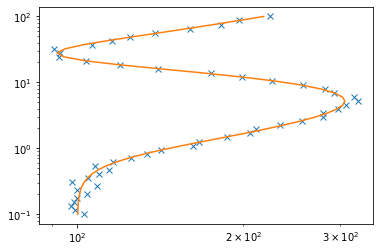

In [4]:
# model response
fig, ax = pg.plt.subplots()
ax.loglog(rhoa, ab2, "x")
ax.loglog(inv.response, ab2, "-")

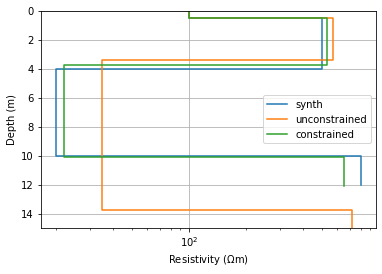

In [7]:
# the models
fig, ax = pg.plt.subplots()
pg.viewer.mpl.drawModel1D(ax, synthk, synres, plot="semilogx", label="synth")
pg.viewer.mpl.drawModel1D(ax, model=model1, label="unconstrained")
pg.viewer.mpl.drawModel1D(ax, model=model2, label="constrained")
ax.set_ylim(15, 0)
ax.grid(True)
ax.legend();